In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'agriculture.csv')

In [3]:
df

,Unnamed: 0,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
0,0,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300,9400,1.287671
1,1,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300,1000,0.303030
2,2,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100,10200,1.009901
3,3,kharif,maize,80,40,20,5.62,654.34,29.266667,2800,4900,1.750000
4,4,kharif,moong,20,40,20,5.68,654.34,29.266667,1300,500,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,summer,maize,80,40,20,5.40,34.81,34.666667,152,154,1.013158
9997,9997,summer,moong,20,40,20,5.60,34.81,34.666667,488,211,0.432377
9998,9998,whole year,onion,120,60,65,5.94,689.88,29.037273,752,9080,12.074468
9999,9999,whole year,potato,180,60,90,5.02,689.88,29.037273,7595,167455,22.048058


In [7]:
df.dtypes

Unnamed: 0              int64
Crop_Type              object
Crop                   object
N                       int64
P                       int64
K                       int64
pH                    float64
rainfall              float64
temperature           float64
Area_in_hectares        int64
Production_in_tons      int64
target                float64
dtype: object

CHECK YHE DATA INFORMATION

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10001 non-null  int64  
 1   Crop_Type           10001 non-null  object 
 2   Crop                10001 non-null  object 
 3   N                   10001 non-null  int64  
 4   P                   10001 non-null  int64  
 5   K                   10001 non-null  int64  
 6   pH                  10001 non-null  float64
 7   rainfall            10001 non-null  float64
 8   temperature         10001 non-null  float64
 9   Area_in_hectares    10001 non-null  int64  
 10  Production_in_tons  10001 non-null  int64  
 11  target              10001 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 937.7+ KB


CHECK THE MISSING VALUE

In [13]:
df.isnull().sum()

Unnamed: 0            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
target                0
dtype: int64

CHECK THE DUPLICATE VALUE IN DATA

In [16]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10001, dtype: bool

CHECK THE COLUMN

In [12]:
df.columns

Index(['Unnamed: 0', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares', 'Production_in_tons', 'target '],
      dtype='object')

RENAME THE COLUMNS FOR CLARITY

In [14]:
df.rename(columns={'Unnamed: 0':'Sr_No'},inplace=True)

DISPLAYE DISCRIPTIVE STATISTICS

In [16]:
df.describe()

,Sr_No,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,1.000100e+04,10001.000000
mean,5000.000000,69.146585,41.527847,39.709029,5.645313,670.237772,26.752053,18956.858714,3.886877e+04,4.128522
std,2887.184355,37.197031,13.998587,26.615039,0.487916,604.413140,5.078345,45938.016774,1.134659e+05,30.233001
min,0.000000,10.000000,10.000000,20.000000,4.820000,3.274569,1.180000,1.000000,1.000000e+00,0.000514
25%,2500.000000,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,193.000000,2.000000e+02,0.571429
50%,5000.000000,80.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1638.000000,2.000000e+03,1.180132
75%,7500.000000,80.000000,50.000000,40.000000,5.900000,1011.490000,29.566667,11435.000000,1.810000e+04,2.393728
max,10000.000000,180.000000,75.000000,150.000000,7.000000,3041.400000,35.346667,726300.000000,1.823000e+06,1494.000000


CHECK THE UNIQUE VALUE IN PARTICULER COLUMNS

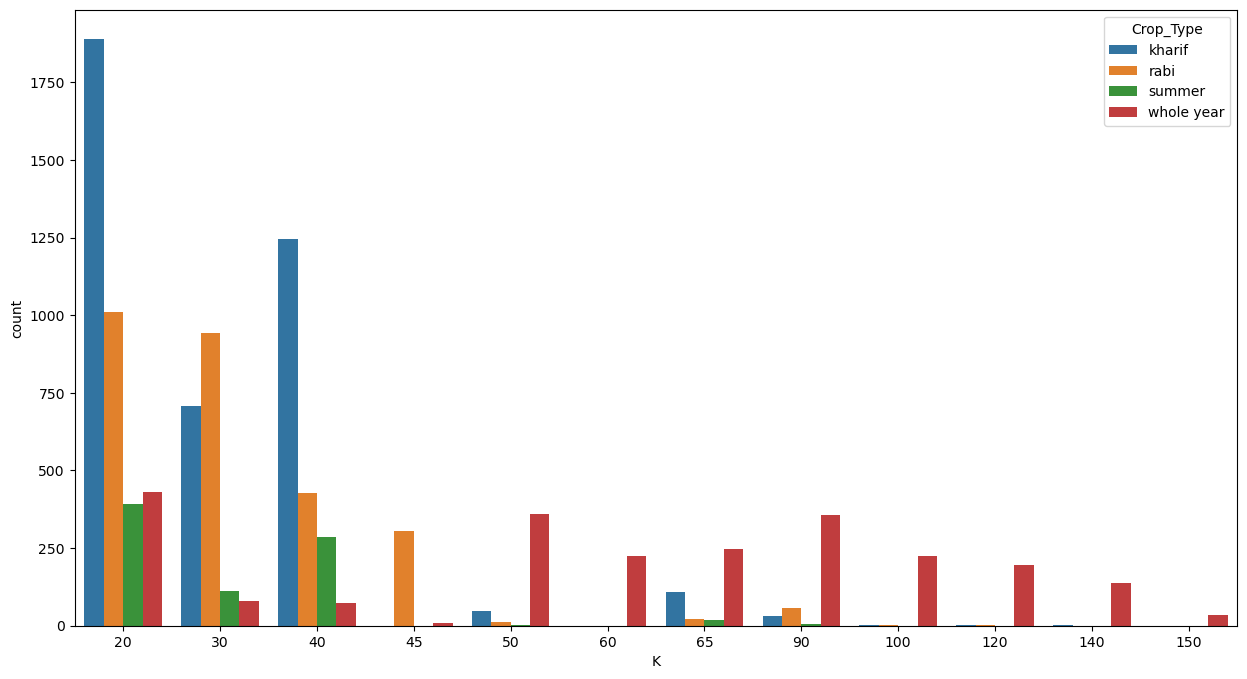

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['K'],data=df,hue='Crop_Type')
plt.show()

<Axes: xlabel='Crop_Type', ylabel='Area_in_hectares'>

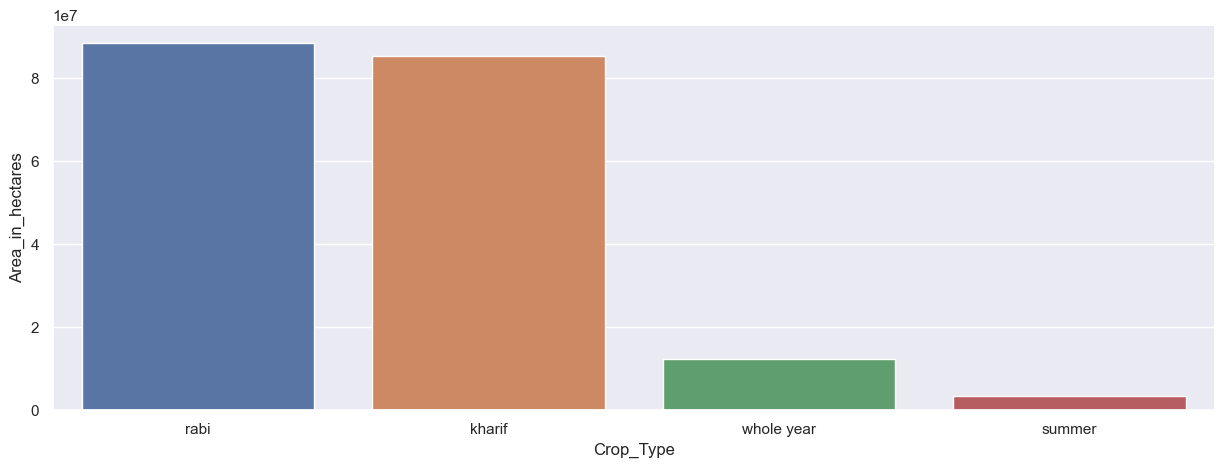

In [28]:
plt.figure(figsize=(15,5))
data=df.groupby(['Crop_Type'],as_index=False)['Area_in_hectares'].sum().sort_values(by='Area_in_hectares',ascending=False)
q=sns.barplot(x='Crop_Type',y='Area_in_hectares',data=data)
q
# for i in q.containers:
#     q.bar_label(i)

In [29]:
xx=df.groupby(['Crop_Type'],as_index=False)['Area_in_hectares'].sum().sort_values(by='Area_in_hectares',ascending=False)
xx

,Crop_Type,Area_in_hectares
1,rabi,88392469
0,kharif,85464708
3,whole year,12257921
2,summer,3472446


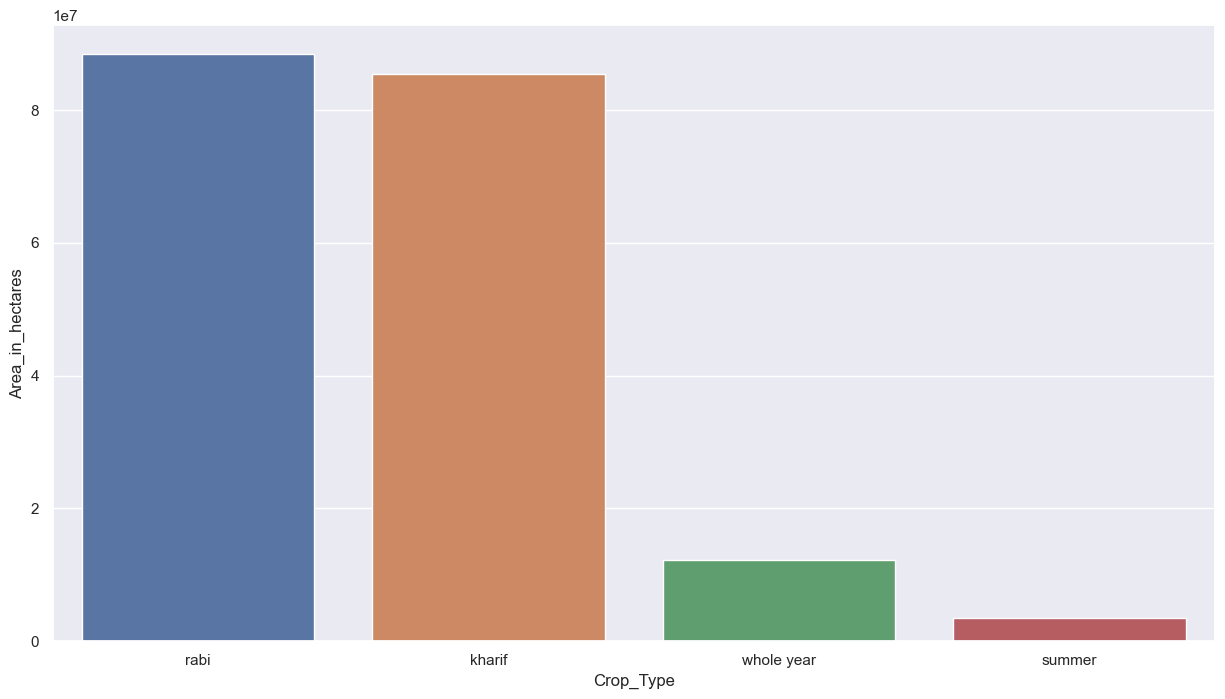

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x='Crop_Type',y='Area_in_hectares',data=xx)
plt.show()

In [31]:
xx=df.groupby(['Crop'],as_index=False)['Area_in_hectares'].sum().sort_values(by='Area_in_hectares',ascending=True)
xx

,Crop,Area_in_hectares
3,blackgram,25116
23,sweetpotato,50411
9,garlic,77379
25,turmeric,94018
5,cardamom,94082
7,coriander,340254
6,cashewnuts,347801
15,onion,368047
4,blackpepper,370525
1,banana,407401


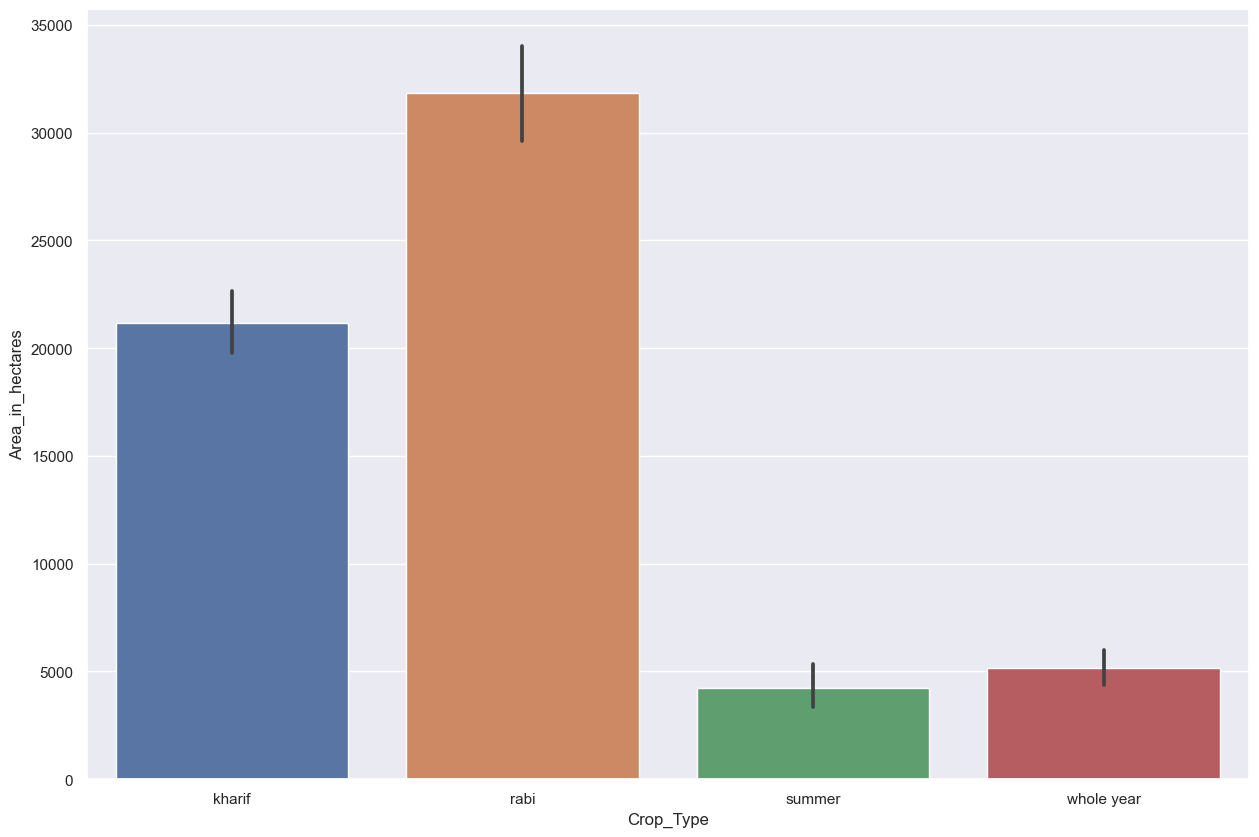

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(x='Crop_Type',y='Area_in_hectares',data=df)
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label_encoder=LabelEncoder()

In [46]:
df['Crop_Type']=label_encoder.fit_transform(df['Crop_Type'])

In [48]:
df

,Unnamed: 0,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
0,0,0,cotton,120,40,20,5.46,654.34,29.266667,7300,9400,1.287671
1,1,0,horsegram,20,60,20,6.18,654.34,29.266667,3300,1000,0.303030
2,2,0,jowar,80,40,40,5.42,654.34,29.266667,10100,10200,1.009901
3,3,0,maize,80,40,20,5.62,654.34,29.266667,2800,4900,1.750000
4,4,0,moong,20,40,20,5.68,654.34,29.266667,1300,500,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,2,maize,80,40,20,5.40,34.81,34.666667,152,154,1.013158
9997,9997,2,moong,20,40,20,5.60,34.81,34.666667,488,211,0.432377
9998,9998,3,onion,120,60,65,5.94,689.88,29.037273,752,9080,12.074468
9999,9999,3,potato,180,60,90,5.02,689.88,29.037273,7595,167455,22.048058


In [44]:
df['Crop']=label_encoder.fit_transform(df['Crop'])

In [58]:
df

,Sr_No,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
0,0,0,8,120,40,20,5.46,654.34,29.266667,7300,9400,1.287671
1,1,0,10,20,60,20,6.18,654.34,29.266667,3300,1000,0.303030
2,2,0,11,80,40,40,5.42,654.34,29.266667,10100,10200,1.009901
3,3,0,13,80,40,20,5.62,654.34,29.266667,2800,4900,1.750000
4,4,0,14,20,40,20,5.68,654.34,29.266667,1300,500,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,2,13,80,40,20,5.40,34.81,34.666667,152,154,1.013158
9997,9997,2,14,20,40,20,5.60,34.81,34.666667,488,211,0.432377
9998,9998,3,15,120,60,65,5.94,689.88,29.037273,752,9080,12.074468
9999,9999,3,16,180,60,90,5.02,689.88,29.037273,7595,167455,22.048058


In [59]:
df

,Sr_No,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
0,0,0,8,120,40,20,5.46,654.34,29.266667,7300,9400,1.287671
1,1,0,10,20,60,20,6.18,654.34,29.266667,3300,1000,0.303030
2,2,0,11,80,40,40,5.42,654.34,29.266667,10100,10200,1.009901
3,3,0,13,80,40,20,5.62,654.34,29.266667,2800,4900,1.750000
4,4,0,14,20,40,20,5.68,654.34,29.266667,1300,500,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,2,13,80,40,20,5.40,34.81,34.666667,152,154,1.013158
9997,9997,2,14,20,40,20,5.60,34.81,34.666667,488,211,0.432377
9998,9998,3,15,120,60,65,5.94,689.88,29.037273,752,9080,12.074468
9999,9999,3,16,180,60,90,5.02,689.88,29.037273,7595,167455,22.048058


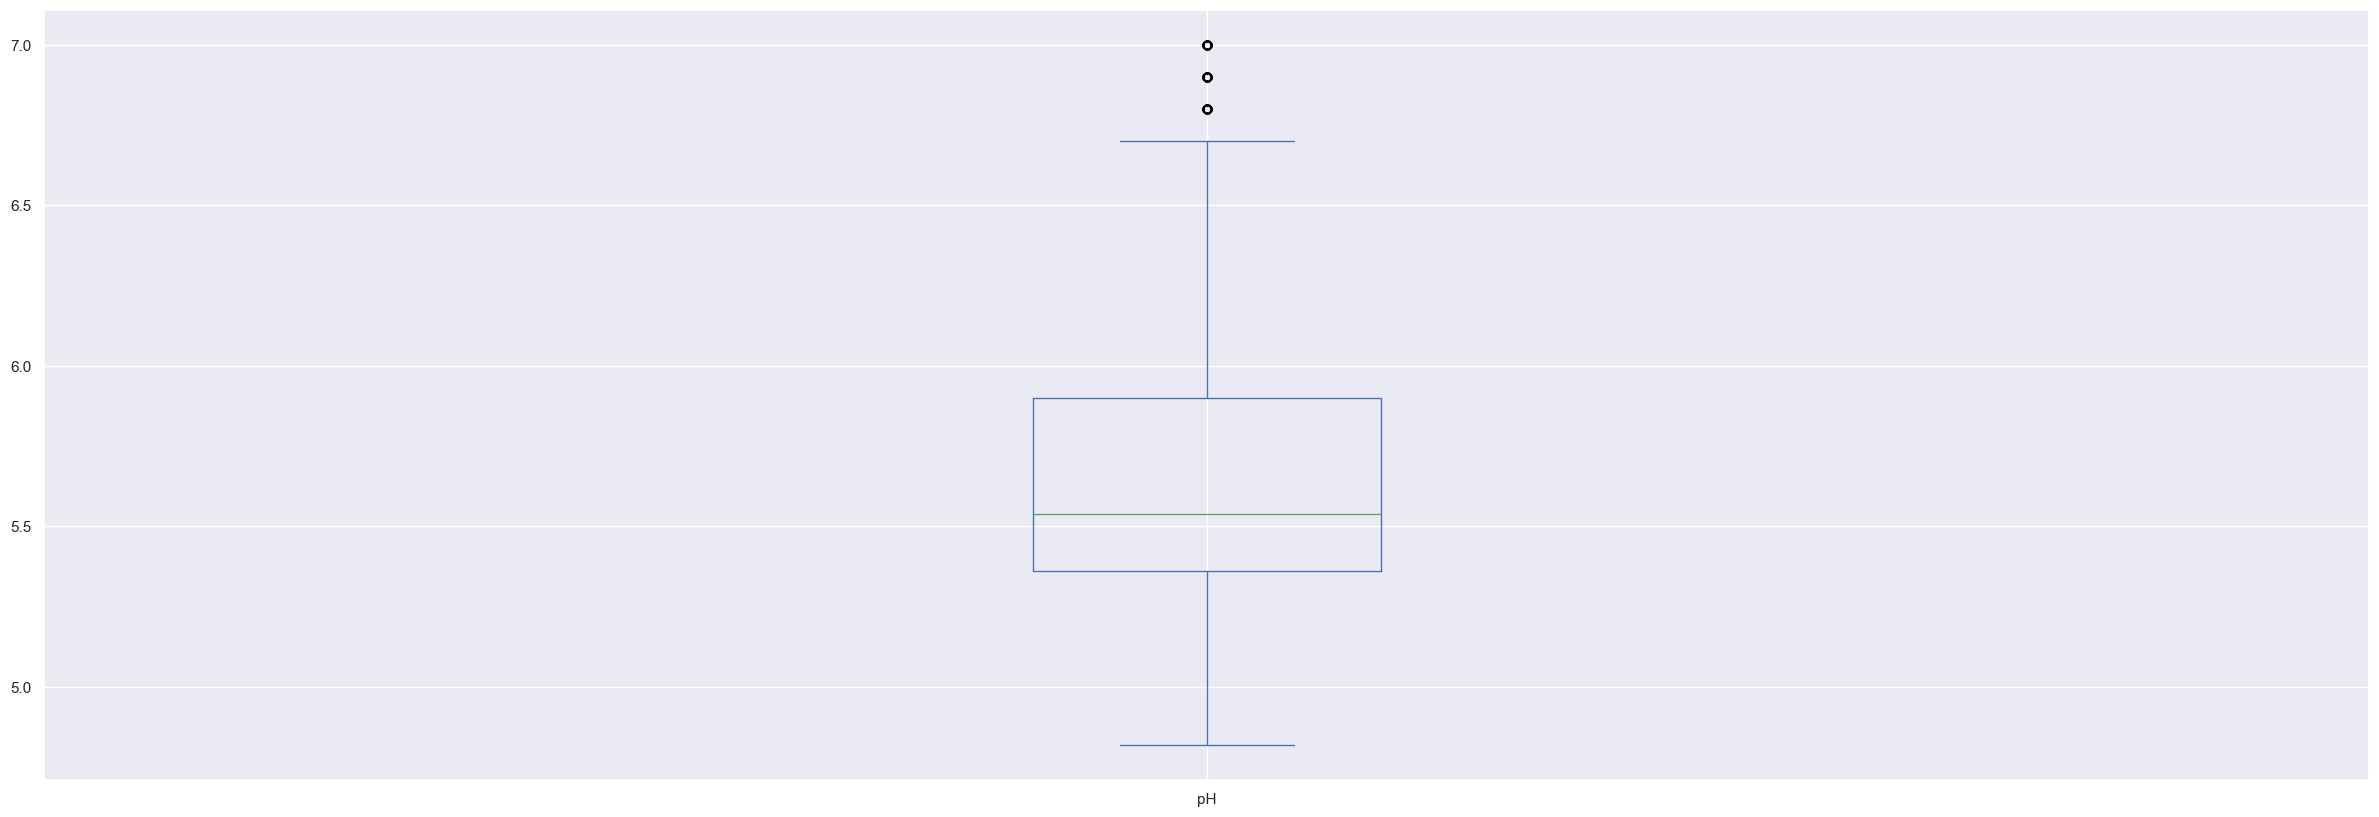

In [85]:
df["pH"].plot(kind="box")
plt.show()

In [159]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
z_scaled = scaler.fit_transform(z)
z_scaled


array([[-0.97064316, -1.17950214,  1.36720475, ...,  0.49518872,
        -0.25376458, -0.25972778],
       [-0.97064316, -0.86635638, -1.32131628, ...,  0.49518872,
        -0.34084278, -0.33376255],
       [-0.97064316, -0.70978349,  0.29179634, ...,  0.49518872,
        -0.19280984, -0.25267685],
       ...,
       [ 1.55535273, -0.08349197,  1.36720475, ...,  0.45001545,
        -0.3963116 , -0.26254815],
       [ 1.55535273,  0.07308091,  2.98031736, ...,  0.45001545,
        -0.24734256,  1.13331571],
       [-0.97064316, -0.39663773,  0.29179634, ...,  1.42926675,
        -0.16784016, -0.31274196]])